In [0]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Задания для курсовой работы!

Добрый день, друзья!
Отправляем вам задания для курсовой работы!
Мы желаем вам продуктивной работы и успехов!

Цель данной курсовой работы - создание нейронной сети, способной распознавать эмоции (в данном случае улыбку) по фотографиям

Задание 1

Работа с датасетами: вам будут предоставлены два датасета, один в иерархическом формате HDF5, второй - в формате csv (рекомендуется использовать питоновские библиотеки h5py и pandas).

Ваша задача - верно извлечь данные о картинках и классификационные разметочные данные, верно разделив данные на пропорции.

Усложненная версия - найти размеченный датасет самому (или использовать методы машинного обучения для разметки).

Оба датасета - набор фотографий лиц людей и значение классификатора, привязанное к каждой фотографии (1 - улыбка, 0 - её отсутствие).

Первый датасет уже разбит на тренировочную и тестовую выборки:

	количество тренировочных примеров = 600
	количество тестовых примеров = 150
	размерность X_тренировочного: (600, 64, 64, 3)
	размерность Y_тренировочного (600, 1)
	размерность X_тестового: (150, 64, 64, 3)
	размерность Y_тестового (150, 1)
Второй датасет включает в себя:

	400 изображений размером (64,64) (для удобства переноса в вид массива numpy была применена функция reshape, дающая вид (400, 4096))
	400 значений классификатора, которые вам предстоит разбить на тренировочную и тестовую выборки самостоятельно

Задание 2

Создание нейросети, чья тестовая точность будет выше 75%. Задание подразумевает простор для творчества и экспериментов, вот некоторые из шагов, которые стоит попробовать:

	Использование блоков следующего вида:
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)
	Использование слоёв MAXPOOL после вышеуказанных блоков, что поможет с уменьшением размерности в ширине/высоте.
	Выбор альтернативного оптимизатора (по умолчанию стоит Adam, можно опробовать иные).
	Изменение размера batch_size (значения в районе 10 должны выдавать приемлемые результаты).
	Изменение числа эпох.

Задание 3

Испытание своей сети на своей фотографии. Допускается точность распознавания улыбки в 60% (рекомендую собрать небольшой датасет с фотографиями себя; 6 из 10 случаев распознавания будет достаточно).

Задание 4

Генерация отчёта. Ваш отчёт должен включать в себя:

Краткое описание предпринятых шагов, описание вашего подхода:

	как подбирали архитектуру
	почему выбрали именно такую
	какие варианты пробовали и какая точность получилась
	где испытывали сложности - в свободной форме
	не более страницы А4
	Табличку сравнения точностей на обучающей и тестовых выборках промежуточных вариантов сети (+ архитектуры этих сетей) - минимум 10 вариантов.
	Наглядную архитектуру итоговой сети (используйте встроенные методы model.summary() и plot_model(), они выдадут текстовую информацию и изображение вашей архитектуры соответственно).
	
Примененные callback-функции:

	BaseLogger
	TerminateOnNaN
	History
	ModelCheckpoint
	EarlyStopping
	TensorBoard
	ReduceLROnPlateau
Большинство данных функций и как ими пользоваться были описаны у Андрея Созыкина в лекции:
https://youtu.be/gKOKEjPP3Qc

	Скачать презентацию лекции
https://drive.google.com/file/d/1FT6O50kZoYE1TFOyuZJUUwb-WVG-yC5i/view

	Скачать дополнительные материалы
https://yadi.sk/i/4zS8_h3pcYewdQ
	
Ссылку на .ipynb в Google Colaboratory
https://colab.research.google.com/notebooks/welcome.ipynb#recent=true
с кодом и своими протестированными изображениями
! данный пункт крайне важен, работа должна быть выполнена именно на этой платформе

До 15 июня 2019 необходимо отправить на проверку работу

Чтобы отправить решение курсовой работы, заполните, пожалуйста, форму
Отправить решение курсовой работы
https://docs.google.com/forms/d/e/1FAIpQLSf1-a4ciN6o72ELBTF-q7hA9vBoQNmJYkx8eXlCmVXt5NACkg/viewform

Датасеты
https://drive.google.com/drive/folders/1Ir1BnJZ7vRrCfUpZs0wkdW8MZE89XJQI

In [0]:
#1 15 19 20 5 
!unzip ds
!ls

In [0]:
files.upload()


In [0]:
!ls /content/drive/'My Drive'/'Курсовая работа курс февраль'/

olivetti_X.csv	olivetti_y.csv	test_happy.h5  train_happy.h5


In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Add, Dense, Convolution2D, Conv2D, SeparableConv2D, GlobalMaxPooling2D, MaxPooling2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Layer, Activation, GlobalAveragePooling2D, ZeroPadding2D, AveragePooling2D, Lambda
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop, SGD, Adadelta, Nadam, Adam
from tensorflow.keras import utils
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import glorot_uniform
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import applications
from tensorflow.keras import backend as K
import pickle
from hyperopt import hp, fmin, tpe, hp, STATUS_OK, Trials, space_eval
import random
import os,math
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score
import cv2 as cv

DS_PATH = '/content/drive/My Drive/Курсовая работа курс февраль/'

%matplotlib inline 

#Read data

##olivetti

In [0]:
import pandas as pd
DS_PATH = '/content/drive/My Drive/Курсовая работа курс февраль/'
olivetti_X = pd.read_csv(DS_PATH+'olivetti_X.csv', header=None)
#olivetti_Y = pd.read_csv(DS_PATH+'olivetti_y.csv', header=None)
olivetti_Y = pd.read_csv('olivetti_y2.csv', header=None)

print(olivetti_X.shape)
print(olivetti_Y.shape)
print(np.unique(olivetti_Y))

#olivetti_Y[0].value_counts()

x = np.array(olivetti_X).reshape((400,64,64))
y = np.array(olivetti_Y)

(400, 4096)
(400, 1)
[0 1]


In [0]:
np.where(y==1)


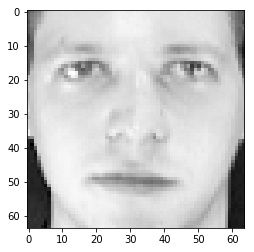

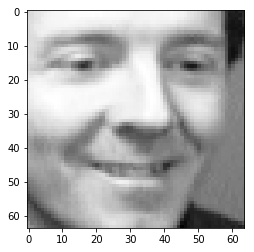

In [0]:
plt.imshow(x[0],cmap = "Greys_r")
plt.show()
plt.imshow(x[21],cmap = "Greys_r")
plt.show()


##happy

###train

list_classes
train_set_x
train_set_y


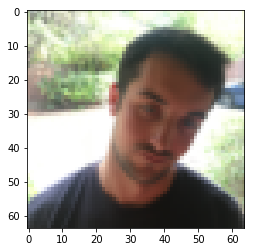

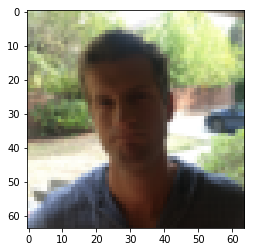

In [60]:
import h5py
filename = DS_PATH+'train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key)
    
train_x = f['train_set_x'].value / 255
train_y = f['train_set_y'].value

from matplotlib import pyplot as plt
plt.imshow(train_x[0])
plt.show()
plt.imshow(train_x[10])
plt.show()

###test

list_classes
test_set_x
test_set_y


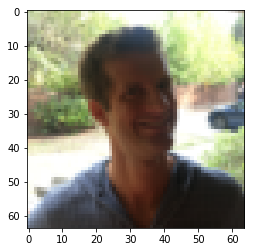

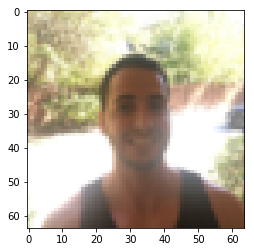

In [61]:
filename = DS_PATH+'test_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key)
    
test_x = f['test_set_x'].value / 255
test_y = f['test_set_y'].value

plt.imshow(test_x[10])
plt.show()
plt.imshow(test_x[100])
plt.show()


In [0]:
test_x[1]

In [0]:
def gray_converter(x):
  #x has shape (batch, width, height, channels)
  return (0.21 * x[:,:,:,:1]) + (0.72 * x[:,:,:,1:2]) + (0.07 * x[:,:,:,-1:])

# train_x = np.squeeze(gray_converter(train_x))
# test_x = np.squeeze(gray_converter(test_x))
train_x = gray_converter(train_x)
test_x = gray_converter(test_x)


In [0]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(600, 64, 64, 3)
(600,)
(150, 64, 64, 3)
(150,)


##Custom dataset

In [0]:
!rm ds.zip
files.upload()

In [0]:
!unzip ds

In [124]:
nosmile_files = os.listdir('ds/nosmile')
smile_files = os.listdir('ds/smile')

custom_X = []
custom_Y = []
for f in nosmile_files:
  fn = 'ds/nosmile/'+f
  im = plt.imread(fn)
  custom_X.append(im)
  custom_Y.append(0)
  
for f in smile_files:
  fn = 'ds/smile/'+f
  im = plt.imread(fn)
  custom_X.append(im)
  custom_Y.append(1)  
  
custom_X = np.array(custom_X, dtype=np.float32)/255
print(custom_X.shape)
custom_Y = np.array(custom_Y)

(10, 64, 64, 3)


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


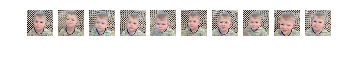

In [128]:
for i in range(custom_X.shape[0]):
    plt.subplot(1, 11, i + 1)
    plt.imshow(custom_X[i])
    plt.axis('off')

#Happy model

##разбиваем данные, создаем генераторы  

In [0]:
from sklearn.model_selection import train_test_split 

split_percent = .25
train_X, val_X, train_Y, val_Y = train_test_split(train_x, train_y, test_size=split_percent, random_state=42)

train_datagen = ImageDataGenerator()
train_datagen.fit(train_X)

val_datagen = ImageDataGenerator()
val_datagen.fit(val_X)


##Модель НС

In [0]:
loss= 'acc'

def create_model(params): 
  model = Sequential()

  model.add(Conv2D(params['filters'], (3, 3), padding="same", activation=params['activation'], input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Conv2D(params['filters'], (3, 3), padding="same", activation=params['activation']))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(params['drop']))

  model.add(Flatten())
  model.add(Dense(params['units'], activation=params['activation']))
  model.add(BatchNormalization())
  model.add(Dropout(params['drop']*2))

  model.add(Dense(1, activation="sigmoid"))
  return model

def create_model1(params): 
  model = Sequential()

  model.add(Conv2D(params['filters'], (3, 3), padding="same", activation=params['activation'], input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Conv2D(params['filters'], (3, 3), padding="same", activation=params['activation']))
  model.add(BatchNormalization())
  
  model.add(GlobalMaxPooling2D())
  model.add(Dropout(params['drop']))
  model.add(Dense(params['units'], activation=params['activation']))
  model.add(BatchNormalization())
  model.add(Dropout(params['drop']*2))

  model.add(Dense(1, activation="sigmoid"))
  return model


def step_decay(epoch):
  initial_lrate = params['lr']
  drop = 0.95
  epochs_drop = 2.0
  lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
  return lrate    
lrate = LearningRateScheduler (step_decay)
сheckpoint = ModelCheckpoint('model.hdf5', monitor='val_'+loss, save_best_only=True, verbose=0)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_'+loss, patience=5, verbose=0, factor=0.5, min_lr=0.00001)
# earlystop = EarlyStopping(monitor='val_'+loss, min_delta=0.001, patience=30,verbose=0, mode='auto')


##Обучаем НС

In [64]:
input_shape = (64,64,3)

#параметры подобранные оптимизацией
params = {'activation': 'relu', 'batch_size': 16, 'drop': 0.1, 'filters': 4, 'layers': 2, 'lr': 0.005, 'units': 4}
batch_size = params['batch_size']

model = create_model(params)
opt = RMSprop()
#opt = "adam"
#opt = Adam(lr=params['lr'], decay=params['lr'] /  3)
#opt = Nadam(lr=params['lr'])
#opt = SGD(lr=params['lr'], decay=params['lr'] / 3, momentum=0.9, nesterov=True)
#opt = Adadelta(lr=params['lr'], rho=0.95, epsilon=1e-06, clipnorm=10, clipvalue=0)
#opt = Adadelta(lr=0.1, rho=0.95, epsilon=1e-6)
#opt = RMSprop(lr=0.1, rho=0.9, epsilon=1e-6)
#opt = RMSprop(lr=params['lr'], rho=0.9, epsilon=1e-08, decay=params['lr'] / 3)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[loss])

history = model.fit_generator(
        train_datagen.flow(train_X, train_Y, batch_size = batch_size),
        epochs=50,
        validation_data=val_datagen.flow(val_X, val_Y, batch_size = batch_size),
        callbacks=[сheckpoint,lrate])

Epoch 1/50
29/29 [==============================] - 13s 444ms/step - loss: 0.5740 - acc: 0.7556 - val_loss: 0.7388 - val_acc: 0.4333
Epoch 2/50
29/29 [==============================] - 1s 18ms/step - loss: 0.3783 - acc: 0.8800 - val_loss: 0.8972 - val_acc: 0.4333
Epoch 3/50
29/29 [==============================] - 1s 19ms/step - loss: 0.3292 - acc: 0.9156 - val_loss: 1.2057 - val_acc: 0.4333
Epoch 4/50
29/29 [==============================] - 1s 18ms/step - loss: 0.2733 - acc: 0.9378 - val_loss: 1.3649 - val_acc: 0.4333
Epoch 5/50
29/29 [==============================] - 1s 20ms/step - loss: 0.2290 - acc: 0.9422 - val_loss: 1.1054 - val_acc: 0.4333
Epoch 6/50
29/29 [==============================] - 1s 19ms/step - loss: 0.2184 - acc: 0.9578 - val_loss: 1.2362 - val_acc: 0.4333
Epoch 7/50
29/29 [==============================] - 1s 19ms/step - loss: 0.1603 - acc: 0.9667 - val_loss: 1.1665 - val_acc: 0.4333
Epoch 8/50
29/29 [==============================] - 1s 19ms/step - loss: 0.1403 -

##График обучения

0.99333334


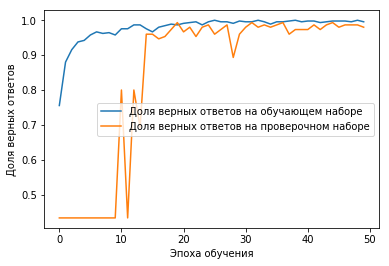

In [65]:
print(np.max(history.history['val_acc']))
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

##Визуализация модели

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 64, 64, 4)         112       
_________________________________________________________________
batch_normalization_42 (Batc (None, 64, 64, 4)         16        
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 4)         148       
_________________________________________________________________
batch_normalization_43 (Batc (None, 64, 64, 4)         16        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 4)         0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 4)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 4096)            

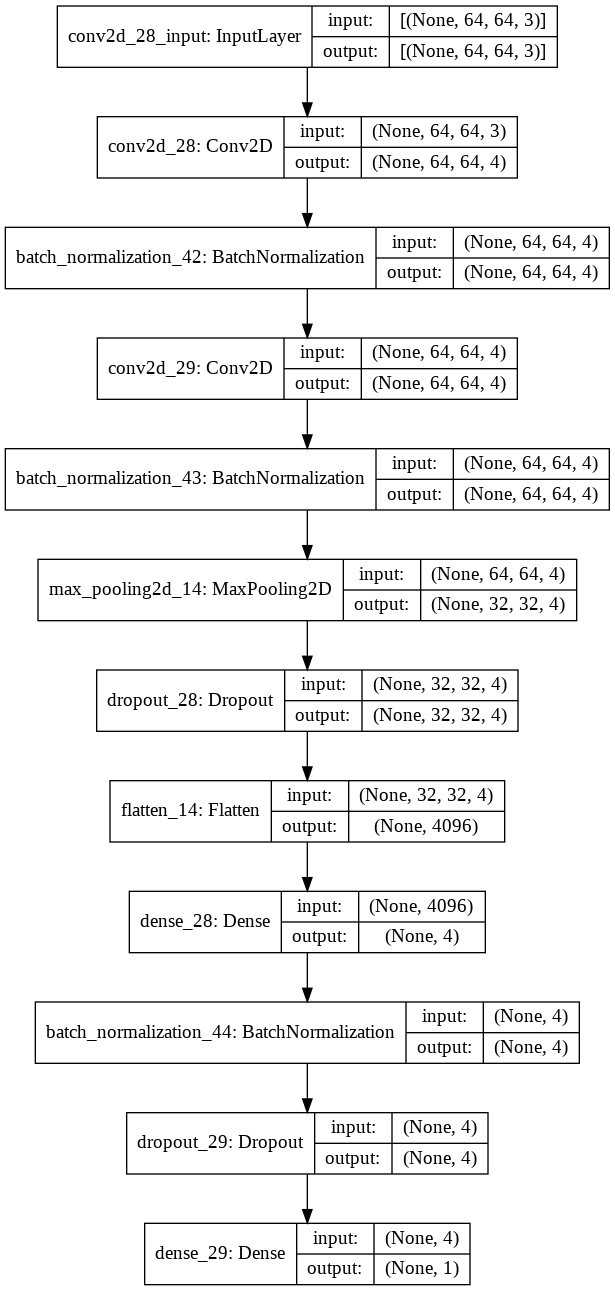

In [0]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


##Проверка на тестовых данных

In [0]:
model = create_model(params)
model.load_weights('model.hdf5')
pred_y = model.predict_classes(test_x).flatten()


In [130]:
print(accuracy_score(test_y, pred_y))

0.9533333333333334


##Подбор параметров НС

In [0]:
loss= 'acc'

def create_model(params): 
  model = Sequential()

  model.add(Conv2D(params['filters'], (3, 3), padding="same", activation=params['activation'], input_shape=input_shape))
  model.add(BatchNormalization())
  if params['layers']==2:
    model.add(Conv2D(params['filters'], (3, 3), padding="same", activation=params['activation']))
    model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(params['drop']))

  model.add(Flatten())
  model.add(Dense(params['units'], activation=params['activation']))
  model.add(BatchNormalization())
  model.add(Dropout(params['drop']*2))

  model.add(Dense(1, activation="sigmoid"))
  
  model.compile(loss="binary_crossentropy", optimizer=RMSprop(), metrics=[loss])
  
  return model


#целевая функция минимизации (для поиска гиперпараметров)
def objective(params):
  np.random.seed(42)
  random.seed(13)
  
  batch_size = params['batch_size']
  
  model = create_model(params)
  history = model.fit_generator(
        train_datagen.flow(train_X, train_Y, batch_size = batch_size),
        epochs=15,
        validation_data=test_datagen.flow(test_X,test_Y, batch_size = batch_size),
        callbacks=[сheckpoint,lrate])

  validation_acc = np.max(history.history['val_acc'])  
  return {'loss': -validation_acc, 'status': STATUS_OK}  

def space_eval_trial(space, trial):
    for_eval = {}
    for k, v in trial["misc"]["vals"].items():
        if len(v) == 0:
            for_eval[k] = None
        else:
            for_eval[k] = v[0]
    return space_eval(space, for_eval)

In [0]:
#параметры оптимизации

space = { 'activation' : hp.choice('activation', ['relu','elu']), 
          'lr' : hp.choice('lr', [.01,.05,.001,.005]), 
          'batch_size' : hp.choice('batch_size', [16,32,64]), 
          'drop' : hp.choice('drop', [.05,.1,.2]), 
          'units' : hp.choice('units', [4,8,16]), 
          'filters' : hp.choice('filters', [4,8,16]), 
          'layers' : hp.choice('layers', [1,2]), 
        }

  
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, trials=trials, max_evals=10)

print (best)

##Результаты подбора параметров

In [0]:
for trial in sorted(trials, key=lambda x: x['result']['loss'], reverse=False):
  print(-trial['result']['loss'],space_eval_trial(space, trial))
  
# 0.9833333492279053 {'activation': 'relu', 'batch_size': 16, 'drop': 0.1, 'filters': 4, 'layers': 2, 'lr': 0.005, 'units': 4}
# 0.9750000238418579 {'activation': 'elu', 'batch_size': 16, 'drop': 0.1, 'filters': 8, 'layers': 1, 'lr': 0.005, 'units': 16}
# 0.9750000238418579 {'activation': 'elu', 'batch_size': 16, 'drop': 0.1, 'filters': 16, 'layers': 1, 'lr': 0.005, 'units': 4}
# 0.9750000238418579 {'activation': 'relu', 'batch_size': 32, 'drop': 0.05, 'filters': 16, 'layers': 1, 'lr': 0.001, 'units': 4}
# 0.9666666388511658 {'activation': 'elu', 'batch_size': 64, 'drop': 0.05, 'filters': 16, 'layers': 1, 'lr': 0.01, 'units': 16}
# 0.9583333134651184 {'activation': 'elu', 'batch_size': 32, 'drop': 0.2, 'filters': 16, 'layers': 2, 'lr': 0.05, 'units': 4}
# 0.9333333373069763 {'activation': 'relu', 'batch_size': 16, 'drop': 0.2, 'filters': 4, 'layers': 1, 'lr': 0.005, 'units': 8}
# 0.875 {'activation': 'relu', 'batch_size': 32, 'drop': 0.2, 'filters': 4, 'layers': 2, 'lr': 0.05, 'units': 16}
# 0.8416666388511658 {'activation': 'relu', 'batch_size': 32, 'drop': 0.1, 'filters': 8, 'layers': 2, 'lr': 0.005, 'units': 16}
# 0.8333333134651184 {'activation': 'elu', 'batch_size': 32, 'drop': 0.2, 'filters': 8, 'layers': 2, 'lr': 0.005, 'units': 4}  

0.9833333492279053 {'activation': 'relu', 'batch_size': 16, 'drop': 0.1, 'filters': 4, 'layers': 2, 'lr': 0.005, 'units': 4}
0.9750000238418579 {'activation': 'elu', 'batch_size': 16, 'drop': 0.1, 'filters': 8, 'layers': 1, 'lr': 0.005, 'units': 16}
0.9750000238418579 {'activation': 'elu', 'batch_size': 16, 'drop': 0.1, 'filters': 16, 'layers': 1, 'lr': 0.005, 'units': 4}
0.9750000238418579 {'activation': 'relu', 'batch_size': 32, 'drop': 0.05, 'filters': 16, 'layers': 1, 'lr': 0.001, 'units': 4}
0.9666666388511658 {'activation': 'elu', 'batch_size': 64, 'drop': 0.05, 'filters': 16, 'layers': 1, 'lr': 0.01, 'units': 16}
0.9583333134651184 {'activation': 'elu', 'batch_size': 32, 'drop': 0.2, 'filters': 16, 'layers': 2, 'lr': 0.05, 'units': 4}
0.9333333373069763 {'activation': 'relu', 'batch_size': 16, 'drop': 0.2, 'filters': 4, 'layers': 1, 'lr': 0.005, 'units': 8}
0.875 {'activation': 'relu', 'batch_size': 32, 'drop': 0.2, 'filters': 4, 'layers': 2, 'lr': 0.05, 'units': 16}
0.841666638

##Проверка custom dataset

In [0]:

model = create_model(params)
model.load_weights('model.hdf5')
pred_y = model.predict_classes(custom_X).flatten()



In [127]:
print(accuracy_score(custom_Y, pred_y))

0.7


##model 7

In [0]:
loss = 'acc'

def create_model7(params): 
  X_input = Input(input_shape)  
  
  #1 слой свертки
  x = SeparableConv2D(params['filters'], (3,3), padding='same', activation=params['activation'])(X_input)
  x = BatchNormalization(momentum=params['momentum'])(x)
  x = SeparableConv2D(params['filters'], (3,3), padding='same', activation=params['activation'])(x)
  x = BatchNormalization(momentum=params['momentum'])(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  x_shortcut = x 
  
  #2 слой свертки
  x = SeparableConv2D(2*params['filters'], (3,3), padding='same', activation=params['activation'], kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = BatchNormalization(momentum=params['momentum'])(x)  
  x = SeparableConv2D(2*params['filters'], (3,3), padding='same', activation=params['activation'], kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = BatchNormalization(momentum=params['momentum'])(x)
  
  x = MaxPooling2D(pool_size=(2,2))(x)
  
  #сопоставления размерностей
  x_shortcut = SeparableConv2D(filters = 2*params['filters'], kernel_size = (1, 1), strides = (2,2), padding = 'same', activation=params['activation'])(x_shortcut)
  x_shortcut = BatchNormalization(axis = 2)(x_shortcut)

  #Соединения быстрого доступа (shortcut connections)
  x = Add()([x, x_shortcut])
  x = Activation(params['activation'])(x)

#   x_shortcut = x 
#   #3 слой свертки
#   x = SeparableConv2D(4*params['filters'], (3,3), padding='same', activation=params['activation'], kernel_regularizer=regularizers.l2(weight_decay))(x)
#   x = BatchNormalization(momentum=params['momentum'])(x)
#   x = SeparableConv2D(4*params['filters'], (3,3), padding='same', activation=params['activation'], kernel_regularizer=regularizers.l2(weight_decay))(x)
#   x = BatchNormalization(momentum=params['momentum'])(x)
#   x = MaxPooling2D(pool_size=(2,2))(x)
  
#   #сопоставления размерностей
#   x_shortcut = SeparableConv2D(filters = 4*params['filters'], kernel_size = (1, 1), strides = (2,2), padding = 'same', activation=params['activation'])(x_shortcut)
#   x_shortcut = BatchNormalization(axis = 3)(x_shortcut)
  
#   #Соединения быстрого доступа (shortcut connections)
#   x = Add()([x, x_shortcut])
#   x = Activation(params['activation'])(x)
  
  #выходной слой
  x = AveragePooling2D((2,2), name="avg_pool")(x)
  x = Dropout(params['drop'])(x)    
  x = Flatten()(x)  
  #x = GlobalAveragePooling2D()(x)
    
  x = Dense(params['units'], activation=params['activation'])(x)
  x = Dense(params['units'], activation=params['activation'])(x)
  x = Dropout(params['drop'])(x)
  x = Dense(1)(x)
  x = Activation("sigmoid")(x)
  
  
  model = Model(inputs = X_input, outputs = x)  
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[loss])
  
  return(model)



In [0]:
from sklearn.model_selection import train_test_split 

split_percent = .2
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size=split_percent, random_state=42)

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(train_X)

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen.fit(test_x)

In [0]:
input_shape = (64,64,3)
weight_decay = 1e-4
batch_size = 64

params = {'activation': 'elu', 'batch_size': batch_size, 'drop': 0.3, 'units': 4, 'momentum': 0.8, 'filters':4}

model = create_model7(params)

history = model.fit_generator(
        train_datagen.flow(train_X, train_Y, batch_size = batch_size),
        steps_per_epoch=train_X // batch_size,
        epochs=100,
        validation_data=(test_X,test_Y),
        callbacks=[сheckpoint,earlystop])


Epoch 1/100
8/8 [==============================] - 1s 165ms/step - loss: 0.7848 - acc: 0.4958 - val_loss: 0.8397 - val_acc: 0.5250
Epoch 2/100
8/8 [==============================] - 0s 43ms/step - loss: 0.6913 - acc: 0.5667 - val_loss: 3.5102 - val_acc: 0.5333
Epoch 3/100
8/8 [==============================] - 0s 43ms/step - loss: 0.6694 - acc: 0.5771 - val_loss: 5.3422 - val_acc: 0.5250
Epoch 4/100
8/8 [==============================] - 0s 43ms/step - loss: 0.6666 - acc: 0.5750 - val_loss: 5.1424 - val_acc: 0.5333
Epoch 5/100
8/8 [==============================] - 0s 44ms/step - loss: 0.6396 - acc: 0.6292 - val_loss: 6.2881 - val_acc: 0.5500
Epoch 6/100
8/8 [==============================] - 0s 43ms/step - loss: 0.6432 - acc: 0.5896 - val_loss: 6.4091 - val_acc: 0.5417
Epoch 7/100
8/8 [==============================] - 0s 43ms/step - loss: 0.6207 - acc: 0.6479 - val_loss: 7.0088 - val_acc: 0.5250
Epoch 8/100
8/8 [==============================] - 0s 43ms/step - loss: 0.6053 - acc: 0.6

In [0]:
acc = np.max(history.history['val_acc'])
print(acc)
if acc>.8:
  model = create_model(params)
  model.load_weights('model.hdf5')
  pred_y = model.predict(test_x).flatten().astype(int)

  print(accuracy_score(test_y, pred_y))

0.85
0.88


#Olivetti классификатор на hog и lbp признаках

##ф-я загрузки данных, классифкатор 

In [0]:

from sklearn.decomposition import PCA
from skimage.feature import hog, local_binary_pattern
from sklearn import svm 
from sklearn import metrics

def load_data():
  DS_PATH = '/content/drive/My Drive/Курсовая работа курс февраль/'
  olivetti_X = pd.read_csv(DS_PATH+'olivetti_X.csv', header=None)
  #olivetti_Y = pd.read_csv(DS_PATH+'olivetti_y.csv', header=None)
  olivetti_Y = pd.read_csv('olivetti_y2.csv', header=None)

  #x = np.array(olivetti_X).reshape((400,64,64,1))
  x = np.array(olivetti_X).reshape((400,64,64))
  y = np.array(olivetti_Y)  
  
  split_percent = .2
  train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=split_percent, random_state=13)
  split_percent = .5
  val_X, test_X, val_Y, test_Y = train_test_split(test_X, test_Y, test_size=split_percent, random_state=13)
  
  return train_X, train_Y, val_X, val_Y, test_X, test_Y 


class SmileClassifier:
  def __init__(self,hog_orientations=6, hog_pixels_per_cell=6, lbp_radius = 2, lbp_n_points = 7, n_components = .95, kernel = 'linear', C = 1.):
    self.hog_mean = None
    self.hog_std = None
    self.lbp_mean = None
    self.lbp_std = None
    self.hog_pca = None
    self.lbp_pca = None
    
    self.hog_orientations=hog_orientations
    self.hog_pixels_per_cell=hog_pixels_per_cell
    self.lbp_radius = lbp_radius
    self.lbp_n_points = lbp_n_points
    self.n_components = n_components
    self.kernel = kernel
    self.C = C
  
  #расчет hog признаков 
  def hog_feat(self,image):
    return hog(image, orientations=self.hog_orientations, pixels_per_cell=(self.hog_pixels_per_cell, self.hog_pixels_per_cell), cells_per_block=(1, 1))
  #расчет lbp признаков
  def lbp_feat(self,image,method = 'uniform'):
    return local_binary_pattern(image, self.lbp_n_points * self.lbp_radius, self.lbp_radius, method).ravel()

  
  def standardize(self,X,mean,std):
    X -= mean
    X /= std
    return X
  
  #ф-я обучения классификатора
  def fit(self,train_X,train_Y):
    def hog():
      hog_train_X = np.array(list(map(lambda x : self.hog_feat(x), train_X)))
      self.hog_mean = hog_train_X.mean(0)
      self.hog_std = hog_train_X.std(0)
      return self.standardize(hog_train_X,self.hog_mean,self.hog_std)

    def lbp():
      lbp_train_X = np.array(list(map(lambda x : self.lbp_feat(x), train_X)))
      self.lbp_mean = lbp_train_X.mean(0)
      self.lbp_std = lbp_train_X.std(0)
      return  self.standardize(lbp_train_X,self.lbp_mean,self.lbp_std)

    hog_train_X = hog()
    lbp_train_X = lbp()

    #метод главных компонент для HOG
    self.hog_pca = PCA(n_components=self.n_components)
    self.hog_pca.fit(hog_train_X)
    
    #метод главных компонент для lbp
    self.lbp_pca = PCA(n_components=self.n_components)
    self.lbp_pca.fit(lbp_train_X)
    
    
    train_X = self.preprocess(train_X)
    
    #метод опорных векторов
    self.clf = svm.SVC(C = self.C, kernel = self.kernel)
    self.clf.fit(train_X, train_Y)      
  
  def evaluate(self,val_X, val_Y):
#     val_X = self.preprocess(val_X)
#     predict_Y = self.clf.predict(val_X)     
    predict_Y = self.predict(val_X)
    return metrics.accuracy_score(val_Y, predict_Y)
  
  def preprocess(self,test_X):
    #hog признаки
    hog_test_X = np.array(list(map(lambda x : self.hog_feat(x), test_X)))    
    #стандартизация
    hog_test_X = self.standardize(hog_test_X,self.hog_mean,self.hog_std)
    
    #lbp признаки
    lbp_test_X = np.array(list(map(lambda x : self.lbp_feat(x), test_X)))    
    #стандартизация
    lbp_test_X = self.standardize(lbp_test_X,self.lbp_mean,self.lbp_std)
    
    #pca transform для hog
    hog_pca_test_X = self.hog_pca.transform(hog_test_X)
    #pca transform для lbp
    lbp_pca_test_X = self.lbp_pca.transform(lbp_test_X)
    
    #объединяем hog и lbp признаки
    return np.concatenate((hog_pca_test_X,lbp_pca_test_X),axis=1)    
    
  def predict(self,test_X):
    test_X = self.preprocess(test_X)
    return self.clf.predict(test_X) 

##Разбиваем на выборки, обучение классификатора

In [0]:
train_X, train_Y, val_X, val_Y, test_X, test_Y = load_data()

clf = SmileClassifier()
clf.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##проверка на валидационных данных

In [0]:
# predict_Y = clf.predict(test_X)     
# metrics.accuracy_score(test_Y, predict_Y)
clf.evaluate(val_X,val_Y)     


0.775

##подбор параметров классификатора оптимизацией

In [0]:
#загрузка данных
train_X, test_X, val_X, val_Y, train_Y, test_Y = load_data()

def tune_predict(params):
  hog_orientations=params['hog_orientations']
  hog_pixels_per_cell=params['hog_pixels_per_cell']
  lbp_radius = params['lbp_radius']
  lbp_n_points = params['lbp_n_points']
  n_components = params['n_components']
  kernel = params['kernel']
  C = params['C']
  
  clf = SmileClassifier(hog_orientations, hog_pixels_per_cell, lbp_radius, lbp_n_points, n_components)
  clf.fit(train_X, train_Y)
  predict_Y = clf.predict(val_X)
  return predict_Y
  
#целевая функция минимизации (для поиска гиперпараметров)
def objective(params):
  np.random.seed(42)
  random.seed(13)

  predict_Y = tune_predict(params)
  validation_acc = metrics.accuracy_score(val_Y, predict_Y)
  
  return {'loss': -validation_acc, 'status': STATUS_OK, 'clf': clf}  

def space_eval_trial(space, trial):
    for_eval = {}
    for k, v in trial["misc"]["vals"].items():
        if len(v) == 0:
            for_eval[k] = None
        else:
            for_eval[k] = v[0]
    return space_eval(space, for_eval)

In [0]:
#параметры оптимизации
space = { 'hog_orientations' : 9,#hp.choice('hog_orientations', [7,8,9]), 
          'hog_pixels_per_cell' : 5,#hp.choice('hog_pixels_per_cell', [4,5,6,7]), 
          'lbp_radius' : 3,#hp.choice('lbp_radius', [2,3]), 
          'lbp_n_points' : 7,#hp.choice('lbp_n_points', [6,8,10]), 
          'n_components' : .95,
          'kernel': 'linear', #hp.choice('kernel', ['linear', 'rbf', 'poly']),
          'C': .9,#hp.choice('C', [.7,.8,.9,1.]),
        }

  
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, trials=trials, max_evals=3)

print (best)

##Результаты подбора параметров

In [0]:
for trial in sorted(trials, key=lambda x: x['result']['loss'], reverse=False):
  print(-trial['result']['loss'],space_eval_trial(space, trial))

0.825 {'C': 0.9, 'hog_orientations': 9, 'hog_pixels_per_cell': 5, 'kernel': 'linear', 'lbp_n_points': 8, 'lbp_radius': 3, 'n_components': 0.95}
0.825 {'C': 0.9, 'hog_orientations': 9, 'hog_pixels_per_cell': 5, 'kernel': 'linear', 'lbp_n_points': 6, 'lbp_radius': 3, 'n_components': 0.95}
0.8 {'C': 0.95, 'hog_orientations': 9, 'hog_pixels_per_cell': 4, 'kernel': 'linear', 'lbp_n_points': 6, 'lbp_radius': 2, 'n_components': 0.95}
0.8 {'C': 0.9, 'hog_orientations': 8, 'hog_pixels_per_cell': 5, 'kernel': 'linear', 'lbp_n_points': 10, 'lbp_radius': 3, 'n_components': 0.95}
0.8 {'C': 1.0, 'hog_orientations': 9, 'hog_pixels_per_cell': 4, 'kernel': 'linear', 'lbp_n_points': 6, 'lbp_radius': 2, 'n_components': 0.95}
0.8 {'C': 0.95, 'hog_orientations': 7, 'hog_pixels_per_cell': 6, 'kernel': 'linear', 'lbp_n_points': 10, 'lbp_radius': 3, 'n_components': 0.95}
0.8 {'C': 0.9, 'hog_orientations': 7, 'hog_pixels_per_cell': 6, 'kernel': 'linear', 'lbp_n_points': 8, 'lbp_radius': 3, 'n_components': 0.95

##проверка классификатора на оптимальных параметрах

In [0]:
params = {'C': 0.9, 'hog_orientations': 9, 'hog_pixels_per_cell': 5, 'kernel': 'linear', 'lbp_n_points': 7, 'lbp_radius': 3, 'n_components': 0.95}

hog_orientations=params['hog_orientations']
hog_pixels_per_cell=params['hog_pixels_per_cell']
lbp_radius = params['lbp_radius']
lbp_n_points = params['lbp_n_points']
n_components = params['n_components']
kernel = params['kernel']
C = params['C']

clf = SmileClassifier(hog_orientations, hog_pixels_per_cell, lbp_radius, lbp_n_points, n_components)
clf.fit(train_X, train_Y)

print('validation accuracy:',clf.evaluate(val_X,val_Y))
print('test accuracy:',clf.evaluate(test_X,test_Y))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


validation accuracy: 0.825
test accuracy: 0.85


##проверка классификатора на всех данных

In [0]:
DS_PATH = '/content/drive/My Drive/Курсовая работа курс февраль/'
olivetti_X = pd.read_csv(DS_PATH+'olivetti_X.csv', header=None)
olivetti_Y = pd.read_csv('olivetti_y2.csv', header=None)

x = np.array(olivetti_X).reshape((400,64,64))
y = np.array(olivetti_Y)  

print('all data accuracy:',clf.evaluate(x,y))

all data accuracy: 0.9675


#olivetti model

##Загрузка данных

In [0]:
files.upload()

In [0]:
import pandas as pd
DS_PATH = '/content/drive/My Drive/Курсовая работа курс февраль/'
olivetti_X = pd.read_csv(DS_PATH+'olivetti_X.csv', header=None)
#olivetti_Y = pd.read_csv(DS_PATH+'olivetti_y.csv', header=None)
olivetti_Y = pd.read_csv('olivetti_y2.csv', header=None)

print(olivetti_X.shape)
print(olivetti_Y.shape)
print(np.unique(olivetti_Y))

#olivetti_Y[0].value_counts()

olivetti_X /= 255

x = np.array(olivetti_X).reshape((olivetti_X.shape[0],64,64,1))
y = np.array(olivetti_Y)



(400, 4096)
(400, 1)
[0 1]


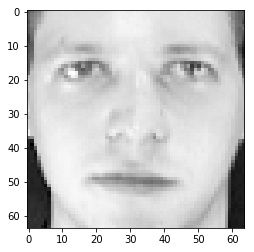

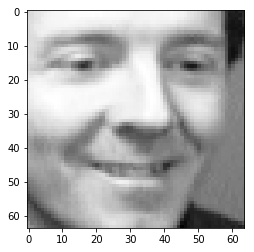

In [0]:
plt.imshow(np.squeeze(x[0]),cmap = "Greys_r")
plt.show()
plt.imshow(np.squeeze(x[21]),cmap = "Greys_r")
plt.show()

##разделяем данные на выборки 

In [0]:
from sklearn.model_selection import train_test_split 

split_percent = .2
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=split_percent, random_state=13)

split_percent = .5
val_X, test_X, val_Y, test_Y = train_test_split(test_X, test_Y, test_size=split_percent, random_state=13)

datagen = ImageDataGenerator()
#       featurewise_center=False,             # set input mean to 0 over the dataset
#       samplewise_center=False,              # set each sample mean to 0
#       featurewise_std_normalization=False,  # divide inputs by std of the dataset
#       samplewise_std_normalization=False,   # divide each input by its std
#       zca_whitening=False,                  # apply ZCA whitening
#       rotation_range=15,                    # randomly rotate images in the range (degrees, 0 to 180)
#       zoom_range = 0.1,                     # Randomly zoom image 
#       width_shift_range=0.1,                # randomly shift images horizontally (fraction of total width)
#       height_shift_range=0.1,               # randomly shift images vertically (fraction of total height)
#       horizontal_flip=False,                # randomly flip images
#       vertical_flip=False)                  # randomly flip images

##Модель НС

In [0]:
def create_model(params):
  model = Sequential()
  model.add(Conv2D(params['filters'], 
                   padding='same',
                   kernel_size=(3, 3),
                   activation=params['activation'],
                   kernel_initializer='he_normal',
                   input_shape=input_shape))
  model.add(Conv2D(params['filters'], 
                   padding='same',
                   kernel_size=(3, 3),
                   activation=params['activation'],
                   kernel_initializer='he_normal'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(params['units'],params['activation'])) 
  #model.add(Dense(128,params['activation']))             
  model.add(Dropout(params['drop']))
  #model.add(Dense(1, activation='sigmoid'))
  model.add(Dense(1, activation='softmax'))
  return model
  
def create_model3(params):  
  model = Sequential()
  model.add(Conv2D(params['filters'], 
                   padding='same',
                   kernel_size=(3, 3),
                   activation=params['activation'],
                   kernel_initializer='he_normal',
                   input_shape=input_shape))

  #model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(params['filters']*2, 
                   padding='same',
                   kernel_size=(3, 3),
                   activation=params['activation'],
                   kernel_initializer='he_normal'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(params['drop']))

  model.add(Flatten())
  model.add(Dense(params['units'],params['activation'])) #Full connection
  model.add(Dropout(params['drop']*2))

  model.add(Dense(1, activation='sigmoid'))
  return model


def create_model2(params):  
  model = Sequential()
  model.add(Conv2D(params['filters'], 
                   kernel_size=(3, 3),
                   activation=params['activation'],
                   kernel_initializer='he_normal',
                   input_shape=input_shape))
  
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(params['filters']*2, 
                   kernel_size=(3, 3),
                   activation=params['activation'],
                   kernel_initializer='he_normal'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(params['units'],params['activation'])) #Full connection
  #model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid'))
  return model

  
def create_model1(params):
  model = Sequential()
  model.add(Conv2D(params['filters'], kernel_size=(3, 3),activation=params['activation'],kernel_initializer='he_normal',input_shape=input_shape))
  model.add(Conv2D(params['filters'], kernel_size=(3, 3),activation=params['activation'],kernel_initializer='he_normal'))
  model.add(MaxPool2D((2, 2)))
  model.add(Dropout(params['drop']))
  
  model.add(Conv2D(params['filters']*2, (3, 3), activation=params['activation'],padding='same',kernel_initializer='he_normal'))
  model.add(Conv2D(params['filters']*2, (3, 3), activation=params['activation'],padding='same',kernel_initializer='he_normal'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(params['drop']))
  model.add(Conv2D(params['filters']*3, (3, 3), activation=params['activation'],padding='same',kernel_initializer='he_normal'))
  model.add(Dropout(params['drop']))
  model.add(Flatten())
  model.add(Dense(params['units'], activation=params['activation']))
  model.add(BatchNormalization())
  model.add(Dropout(params['drop']))
  model.add(Dense(1, activation='sigmoid'))
  return model

def step_decay(epoch):
  initial_lrate = params['lr']
  drop = 0.85
  epochs_drop = 2.0
  lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
  return lrate    
lrate = LearningRateScheduler (step_decay)
сheckpoint = ModelCheckpoint('model.hdf5', monitor='val_'+loss, save_best_only=True, verbose=0)


##Обучение НС

In [0]:
input_shape = train_X.shape[1:]
loss = 'acc'
batch_size = 8
params = {'lr':.01, 'activation': 'elu', 'batch_size': batch_size, 'drop': 0.15, 'units': 32, 'filters':8, 'momentum': .9}

model = create_model1(params)
#opt='adam'
#opt = opt = Adadelta(lr=params['lr'])
#opt = Adam(lr=params['lr'], decay=params['lr'] /  3)
#opt = Nadam(lr=params['lr'])
#opt = SGD(lr=params['lr'], decay=params['lr'] / 3, momentum=0.9, nesterov=True)
#opt = Adadelta(lr=params['lr'], rho=0.95, epsilon=1e-06, clipnorm=10, clipvalue=0)
#opt = Adadelta(lr=0.1, rho=0.95, epsilon=1e-6)
#opt = RMSprop(lr=0.1, rho=0.9, epsilon=1e-6)
#opt = RMSprop(lr=params['lr'], rho=0.9, epsilon=1e-08, decay=params['lr'] / 3)
opt = RMSprop()
#opt = SGD(lr=params['lr'], decay=1e-6, momentum=params['momentum'], nesterov=True)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[loss])

history = model.fit_generator(
        datagen.flow(train_X, train_Y, batch_size = batch_size),
        epochs=100,
        #validation_data=val_datagen.flow(val_X, val_Y, batch_size = batch_size),
        validation_data=(val_X, val_Y),    
        callbacks=[сheckpoint,lrate])
        #callbacks=[сheckpoint,learning_rate_reduction])
  



Epoch 1/100
40/40 [==============================] - 13s 327ms/step - loss: 0.7728 - acc: 0.5844 - val_loss: 0.9555 - val_acc: 0.4500
Epoch 2/100
40/40 [==============================] - 1s 15ms/step - loss: 0.6537 - acc: 0.6625 - val_loss: 1.7465 - val_acc: 0.4500
Epoch 3/100
40/40 [==============================] - 1s 14ms/step - loss: 0.6447 - acc: 0.6656 - val_loss: 1.5349 - val_acc: 0.4500
Epoch 4/100
40/40 [==============================] - 1s 14ms/step - loss: 0.6470 - acc: 0.6656 - val_loss: 0.8242 - val_acc: 0.4500
Epoch 5/100
40/40 [==============================] - 1s 15ms/step - loss: 0.6346 - acc: 0.6594 - val_loss: 0.6842 - val_acc: 0.5500
Epoch 6/100
40/40 [==============================] - 1s 15ms/step - loss: 0.6537 - acc: 0.6531 - val_loss: 2.1655 - val_acc: 0.5500
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: 0.6470 - acc: 0.6656 - val_loss: 0.7405 - val_acc: 0.4500
Epoch 8/100
40/40 [==============================] - 1s 16ms/step - loss: 

0.9


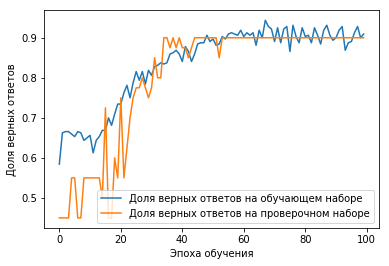

In [0]:
print(np.max(history.history['val_acc']))
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

##Проверка на тестовых данных

In [0]:
model.load_weights('model.hdf5')
model.evaluate(test_X, test_Y)

40/40 [==============================] - 0s 950us/sample - loss: 0.3723 - acc: 0.9000


[0.37228844165802, 0.9]

In [0]:
!cp model.hdf5 model1.hdf5

##Проверка на всех данных 

In [0]:
DS_PATH = '/content/drive/My Drive/Курсовая работа курс февраль/'
olivetti_X = pd.read_csv(DS_PATH+'olivetti_X.csv', header=None)
olivetti_Y = pd.read_csv('olivetti_y2.csv', header=None)

olivetti_X /= 255

x = np.array(olivetti_X).reshape((400,64,64,1))
y = np.array(olivetti_Y)  

model.load_weights('model.hdf5')
pred_y = model.predict_classes(x).flatten()
model.evaluate(x, y)


400/400 [==============================] - 0s 213us/sample - loss: 0.2764 - acc: 0.8925


[0.276422621011734, 0.8925]

##Визуализация модели

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 62, 62, 8)         80        
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 30, 30, 16)        1168      
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 30, 30, 16)        2320      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 15, 15, 16)      

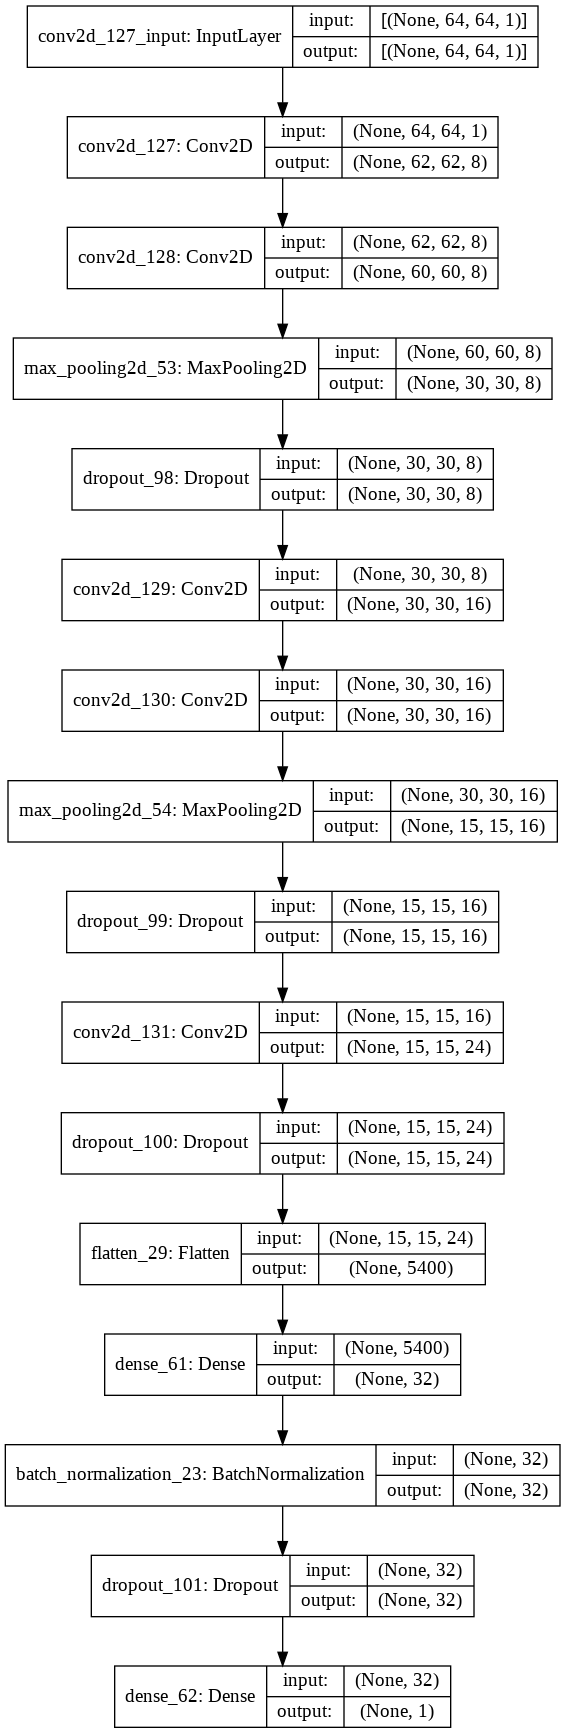

In [0]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

#grey model

In [0]:
import h5py
filename = DS_PATH+'train_happy.h5'
f = h5py.File(filename, 'r')

# for key in f.keys():
#     print(key)
    
train_x = f['train_set_x'].value
train_y = f['train_set_y'].value

In [0]:
y0 = 10
height = 40
x0 = 10
width = 45

train_x = train_x[:, y0:y0+height , x0:x0+width, :]
train_x.shape

(600, 40, 45, 3)

In [0]:
import h5py
filename = DS_PATH+'train_happy.h5'
f = h5py.File(filename, 'r')

# for key in f.keys():
#     print(key)
    
train_x = f['train_set_x'].value
train_y = f['train_set_y'].value

y0 = 10
height = 40
x0 = 10
width = 45

#crop
train_x = train_x[:, y0:y0+height , x0:x0+width, :]

def gray_converter(x):
  #x has shape (batch, width, height, channels)
  return (0.3 * x[:,:,:,:1]) + (0.59 * x[:,:,:,1:2]) + (0.11 * x[:,:,:,-1:])



#train_x = np.repeat(gray_converter(train_x), 3, -1)/255
train_x = gray_converter(train_x)

x = []
for img in train_x:
  x.append(cv.resize(img, (64, 64)))
train_x = np.array(x).reshape((train_x.shape[0],64,64,1))


filename = DS_PATH+'test_happy.h5'
f = h5py.File(filename, 'r')

test_x = f['test_set_x'].value
test_y = f['test_set_y'].value
#crop
test_x = test_x[:, y0:y0+height , x0:x0+width, :]
test_x = gray_converter(test_x)

x = []
for img in test_x:
  x.append(cv.resize(img, (64, 64)))
test_x = np.array(x).reshape((test_x.shape[0],64,64,1))

In [0]:
train_x.shape


(600, 64, 64, 1)

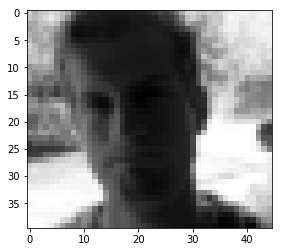

In [0]:
plt.imshow(np.squeeze(train_x[10]),cmap = "Greys_r")

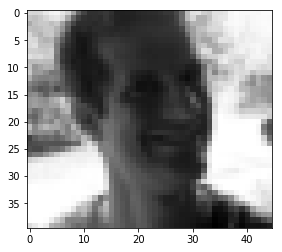

In [0]:
plt.imshow(np.squeeze(test_x[10]),cmap = "Greys_r")

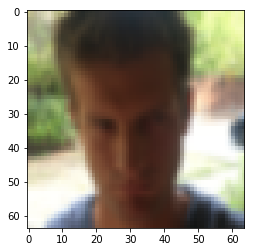

In [0]:
y0 = 10
height = 40
x0 = 10
width = 45

img = train_x[19][y0:y0+height , x0:x0+width, :]
img = cv.resize(img, (64, 64))

plt.imshow(np.squeeze(img),cmap = "Greys_r")


In [0]:
import cv2 as cv

face_cascade = cv.CascadeClassifier('/content/drive/My Drive/data/haarcascade_frontalface_default.xml')
face_cascade_alt = cv.CascadeClassifier('/content/drive/My Drive/data/haarcascade_frontalface_alt.xml')


In [0]:
gray = train_x[10]

#gray = cv.cvtColor (gray, cv.COLOR_BGR2GRAY )
gray = cv.cvtColor (gray, cv.COLOR_RGB2GRAY )
#gray.shape
faces = face_cascade_alt.detectMultiScale(gray, 1.01, 5)
faces

()

In [0]:
modelFile = "opencv_face_detector_uint8.pb"
configFile = "opencv_face_detector.pbtxt"
net = cv.dnn.readNetFromTensorflow(modelFile, configFile)



In [0]:
import h5py
filename = DS_PATH+'train_happy.h5'
f = h5py.File(filename, 'r')

# for key in f.keys():
#     print(key)
    
train_x = f['train_set_x'].value
train_y = f['train_set_y'].value

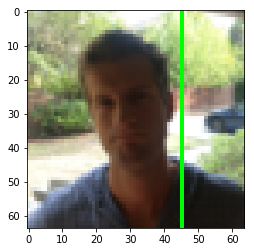

In [0]:

def face_detector(img, conf_threshold = .1):
  gray = np.copy(np.squeeze(img))
  #gray = cv.cvtColor (gray, cv.COLOR_BGR2GRAY )
  #gray = cv.cvtColor (gray, cv.COLOR_RGB2GRAY )
  
  blob = cv.dnn.blobFromImage(gray, 1.0 / 255, (64, 64), (0, 0, 0), swapRB=True, crop=False)
  #blob = cv.dnn.blobFromImage(gray, 1.0, (64, 64), [16, 32, 48], False, False)  
  frameWidth = gray.shape[0]
  frameHeight = gray.shape[1]
  
  conf_threshold = conf_threshold
  net.setInput(blob)
  detections = net.forward()
  bboxes = []
  for i in range(detections.shape[2]):
      confidence = detections[0, 0, i, 2]
      #print(confidence)
      if confidence > conf_threshold:
          x1 = int(detections[0, 0, i, 3] * frameWidth)
          y1 = int(detections[0, 0, i, 4] * frameHeight)
          x2 = int(detections[0, 0, i, 5] * frameWidth)
          y2 = int(detections[0, 0, i, 6] * frameHeight)
          bboxes.append([x1,y1,x2,y2])
          cv.rectangle(gray, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
  return gray  

#bboxes
img = train_x[10]
img = face_detector(img)
plt.imshow(img)
#img.shape

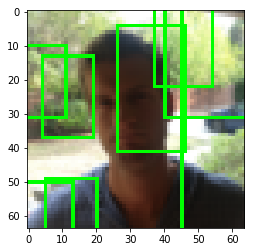

In [0]:
#bboxes
img = train_x[10]
img = face_detector(img)
plt.imshow(img)

In [0]:
#!rm opencv_face_detector_uint8.pb

!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/opencv_face_detector.pbtxt
!wget https://github.com/opencv/opencv_3rdparty/raw/8033c2bc31b3256f0d461c919ecc01c2428ca03b/opencv_face_detector_uint8.pb  
#!wget https://github.com/spmallick/learnopencv/blob/master/FaceDetectionComparison/models/opencv_face_detector_uint8.pb?raw=true opencv_face_detector_uint8.pb
#!cp 'opencv_face_detector_uint8.pb?raw=true' opencv_face_detector_uint8.pb


In [0]:
circles.shape

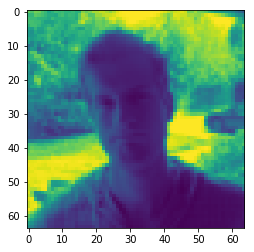

In [0]:
plt.imshow(gray)

In [0]:
#gray = cv.cvtColor(input_face, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.02,
        minNeighbors=3,
        minSize=(20, 20),
        flags=cv.CASCADE_SCALE_IMAGE)
faces  

()

'3.4.3'

In [0]:
from sklearn.model_selection import train_test_split 

split_percent = .2
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size=split_percent, random_state=42)

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(train_X,)

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen.fit(test_x)

In [0]:
loss= 'acc'
input_shape = (train_x.shape[1],train_x.shape[2],1)
def create_model1(params): 
  model = Sequential()

  model.add(Conv2D(params['filters'], (3, 3), padding="same", input_shape=input_shape, activation="relu"))
  model.add(Conv2D(params['filters'], (3, 3), padding="same", activation="relu"))
  #model.add(GlobalMaxPooling2D(pool_size=(2, 2)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(params['drop']))
  
#   model.add(Conv2D(params['filters']*2, (3, 3), padding="same", input_shape=input_shape, activation="relu"))
#   model.add(Conv2D(params['filters']*2, (3, 3), padding="same", activation="relu"))
#   #model.add(GlobalMaxPooling2D(pool_size=(2, 2)))
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(params['drop']))
  
  model.add(Flatten())
  model.add(Dense(params['units'], activation="relu"))
  model.add(Dropout(params['drop']/2))
  model.add(Dense(1, activation="sigmoid"))
  
  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[loss])

  # return the constructed network architecture
  return model  

  
def create_model(params): 
  model = Sequential()
  # first CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(params['filters'], (3, 3), padding="same", input_shape=input_shape))
  model.add(Activation("relu"))
  #model.add(BatchNormalization())
  model.add(Conv2D(params['filters'], (3, 3), padding="same"))
  model.add(Activation("relu"))
  #model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(params['drop']))

#   # second CONV => RELU => CONV => RELU => POOL layer set
#   model.add(Conv2D(params['filters']*2, (3, 3), padding="same"))
#   model.add(Activation("relu"))
#   model.add(BatchNormalization())
#   model.add(Conv2D(params['filters']*2, (3, 3), padding="same"))
#   model.add(Activation("relu"))
#   model.add(BatchNormalization())
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(params['drop']))

  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(params['units']))
  model.add(Activation("relu"))
  #model.add(BatchNormalization())
  model.add(Dropout(params['drop']))

  model.add(Dense(1))
  model.add(Activation("sigmoid"))

  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[loss])

  # return the constructed network architecture
  return model  


сheckpoint = ModelCheckpoint('model.hdf5', monitor='val_'+loss, save_best_only=True, verbose=0)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_'+loss, patience=3, verbose=0, factor=0.5, min_lr=0.00001)

earlystop = EarlyStopping(monitor='val_'+loss, min_delta=0.001, patience=30,verbose=0, mode='auto')


In [0]:
#model.summary()
input_shape

(40, 45, 1)

In [0]:
#input_shape = (64,64,1)
weight_decay = 1e-1
batch_size = 32

params = {'activation': 'elu', 'batch_size': batch_size, 'drop': 0.1, 'units': 128, 'momentum': 0.8, 'filters':32}
batch_size = params['batch_size']

model = create_model1(params)
#model.summary()

history = model.fit_generator(
        train_datagen.flow(train_X, train_Y, batch_size = batch_size),
        steps_per_epoch=train_X // batch_size,
        epochs=20,
        validation_data=(test_X,test_Y),
        callbacks=[сheckpoint])
        #callbacks=[сheckpoint,learning_rate_reduction])


Epoch 1/20
15/15 [==============================] - 1s 93ms/step - loss: 0.7980 - acc: 0.5229 - val_loss: 0.7307 - val_acc: 0.5583
Epoch 2/20
15/15 [==============================] - 0s 18ms/step - loss: 0.6918 - acc: 0.5375 - val_loss: 8.6155 - val_acc: 0.4417
Epoch 3/20
15/15 [==============================] - 0s 24ms/step - loss: 0.6734 - acc: 0.5688 - val_loss: 4.8222 - val_acc: 0.6833
Epoch 4/20
15/15 [==============================] - 0s 26ms/step - loss: 0.6011 - acc: 0.7021 - val_loss: 4.8779 - val_acc: 0.7000
Epoch 5/20
15/15 [==============================] - 0s 25ms/step - loss: 0.5071 - acc: 0.7583 - val_loss: 4.3783 - val_acc: 0.7333
Epoch 6/20
15/15 [==============================] - 0s 24ms/step - loss: 0.3968 - acc: 0.8417 - val_loss: 4.0231 - val_acc: 0.7583
Epoch 7/20
15/15 [==============================] - 1s 66ms/step - loss: 0.2785 - acc: 0.9042 - val_loss: 3.3973 - val_acc: 0.7917
Epoch 8/20
15/15 [==============================] - 0s 19ms/step - loss: 0.2770 - a

In [0]:
!ls

drive  model.hdf5  sample_data


In [0]:
model.load_weights('model.hdf5')
model.evaluate_generator(test_datagen.flow(test_x, test_y))

[0.23149906247854232, 0.9066667]

In [0]:
olivetti_X = pd.read_csv(DS_PATH+'olivetti_X.csv', header=None)
olivetti_Y = pd.read_csv(DS_PATH+'olivetti_y.csv', header=None)
x = np.array(olivetti_X).reshape((400,64,64,1))

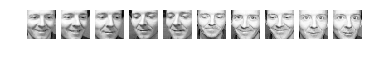

In [0]:
for i in range(20,30):
    face = np.squeeze(x[i])
    plt.subplot(1, 10, i - 19)
    plt.imshow(face, cmap='Greys_r')
    plt.axis('off')

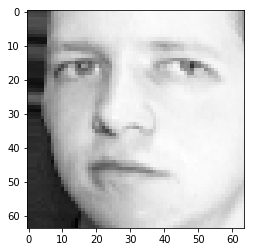

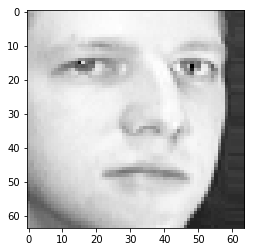

In [0]:
plt.imshow( np.squeeze(x[3]),cmap = "Greys_r")
plt.show()
plt.imshow(np.squeeze(x[4]),cmap = "Greys_r")
plt.show()

In [0]:
prob_y = model.predict(x)


In [0]:
predict_y = prob_y>.5 if 1 else 0

In [0]:
predict_y[predict_y>0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [0]:
predict_y

In [0]:
def gray_converter(x):
  #x has shape (batch, width, height, channels)
  #return (0.21 * x[:,:,:,:1]) + (0.72 * x[:,:,:,1:2]) + (0.07 * x[:,:,:,-1:])
  return (0.3 * x[:,:,:,:1]) + (0.59 * x[:,:,:,1:2]) + (0.11 * x[:,:,:,-1:])

img_gray1 = np.squeeze(gray_converter(train_x))
img_gray1.shape

(600, 64, 64)

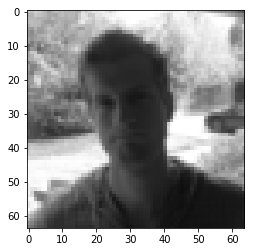

In [0]:
plt.imshow(train_x[10],cmap = "Greys_r")


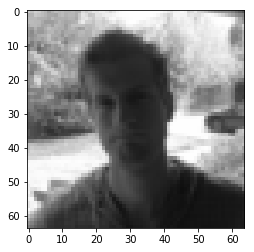

In [0]:
plt.imshow(train_x[10]/256,cmap = "Greys_r")

#Отчет

[Курсовой проект google colab](https://colab.research.google.com/drive/1_69LOsUCrUPbdzk2eOaatpYxYBPfvWk4)

> В ходе работы пытался придерживаться следующего подхода, найти параметры модели при которых НС быстро переобучается, затем добавлял слои Dropout и BatchNormalization для уменьшения  переобучения и повышения качества на валидационной выборке, регуляризацию не использовал тк модели показывали достаточную точность. На happy наборе данных выбираемые модели  показывают достаточно высокую точность > 0.9. Точность промежуточных моделей можно посмотреть в секциях - "Результаты подбора параметров". С набором olivetti были некоторые трудности тк модель недообучалась, поэтому основной упор сделал классификатор на hog и lbp признаках. В работе использовались ф-ции сохранения лучшей модели ModelCheckpoint, изменения скорости обучения LearningRateScheduler и подбор гиперпараметров моделей.

**Happy model**
> Сверточная сеть для happy ДС, остановился на модели описанной в функции create_model, структура сети показана в секции визуализации модели. Модель с подобранными гиперпараметрами на тестовых данных показала точность 0.9533. Проверка на custom dataset точность 0.7.


**Olivetti кассификатор на hog и lbp признаках**
> На основе olivetti ДС выделены признаки направленных градиентов (Histogram of Oriented Gradients (HOG)) и локальные бинарные признаки (Local Binary Patterns (LBP)), из данных признаков выделены главные компоненты (PCA) со значимостью 0.95 и построен классификатор на основе метода опорных векторов (SVM, support vector machine), произведен подбор гиперпараметров. Модель с отобранными параметрами на тестовых данных показала точность 0.85, на полном ДС 0.9675

**olivetti model**
> Сверточная сеть для olivetti ДС, остановился на модели описанной в функции create_model1, структура сети показана в секции  визуализации модели. 
На тестовой выборке модель показала точность 0.9, на всем ДС точность 0.8925

**grey model**
> Пытался сделать общую модель для обоих датасетов, переводил happy ДС в серый цвет, сначала пытался делать кроп лица из картинки и увеличивать до 64х64, также пытался выделять лицо библиотекой CV2 и делать кроп , на маленьких картинках не получилось классифицировать лицо, из-за различия данных не получилось сделать классификатор для обоих ДС.





